In [22]:
import pandas as pd
# Loaded the Mushroom dataset
df = pd.read_csv('mushroom.csv')
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


 Exploratory Data Analysis (EDA)

In [23]:
# perform fundamental data exploration
# Check data types
print("Data types:")
display(df.dtypes)

# Check for missing values
print("\nMissing values:")
display(df.isnull().sum())

# Generate descriptive statistics
print("\nDescriptive statistics:")
display(df.describe())

Data types:


,0
Unnamed: 0,int64
cap_shape,object
cap_surface,object
cap_color,object
bruises,object
odor,object
gill_attachment,object
gill_spacing,object
gill_size,object
gill_color,object



Missing values:


,0
Unnamed: 0,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0



Descriptive statistics:


,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [26]:
# creating numerical and categorical column
numerical_features = []
categorical_features = []

for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        numerical_features.append(col)
    elif df[col].dtype == 'object':
        categorical_features.append(col)

print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)

Numerical features: ['Unnamed: 0', 'stalk_height', 'cap_diameter']
Categorical features: ['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat', 'class']


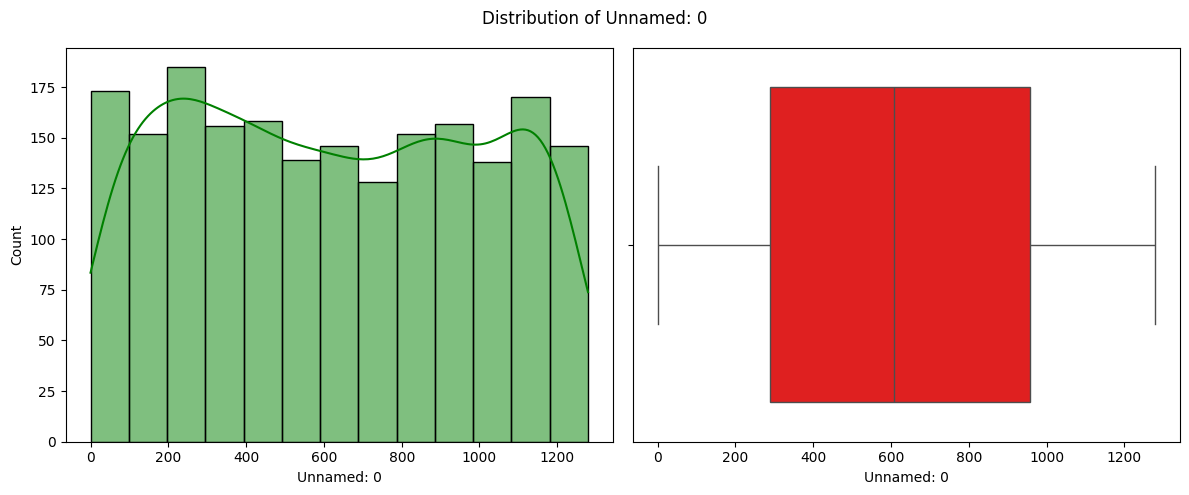

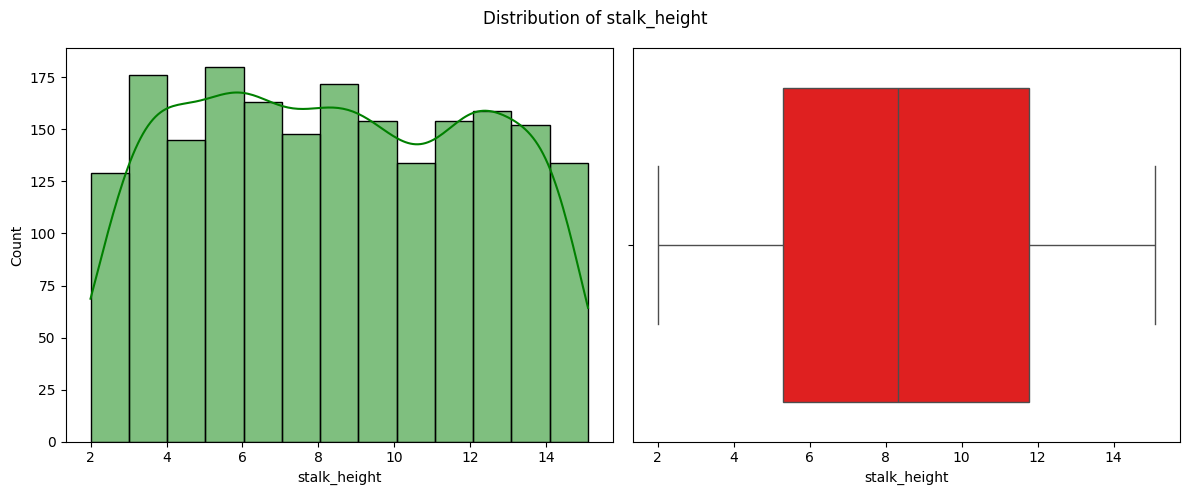

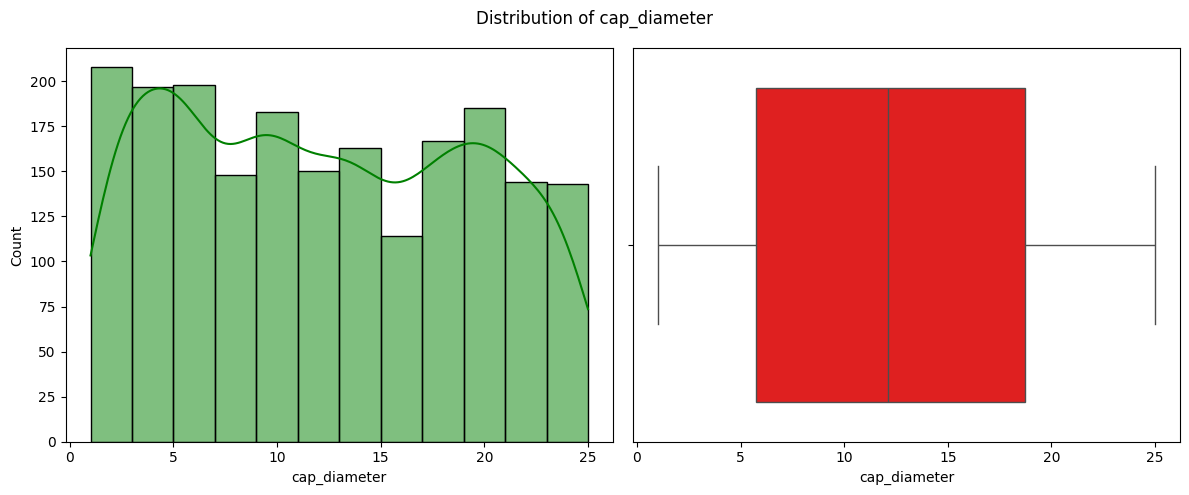

In [30]:
# performing the  histograms, box plots, or density plots to understand feature distributions
import matplotlib.pyplot as plt
import seaborn as sns

for feature in numerical_features:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    sns.histplot(data=df, x=feature, kde=True, ax=axes[0],color = 'green')
    sns.boxplot(data=df, x=feature, ax=axes[1],color = 'red')
    fig.suptitle(f'Distribution of {feature}')
    plt.tight_layout()
    plt.show()

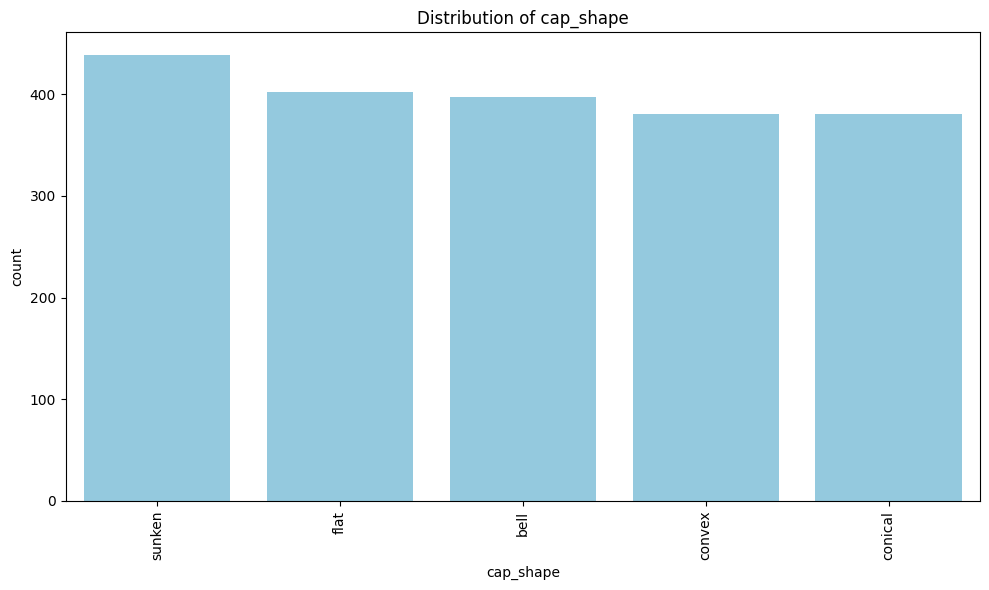

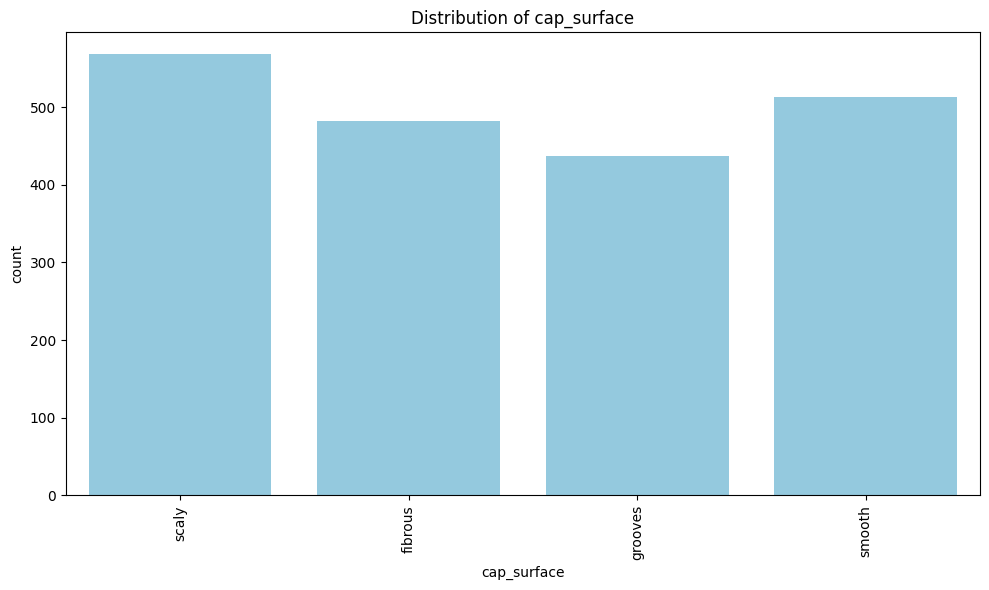

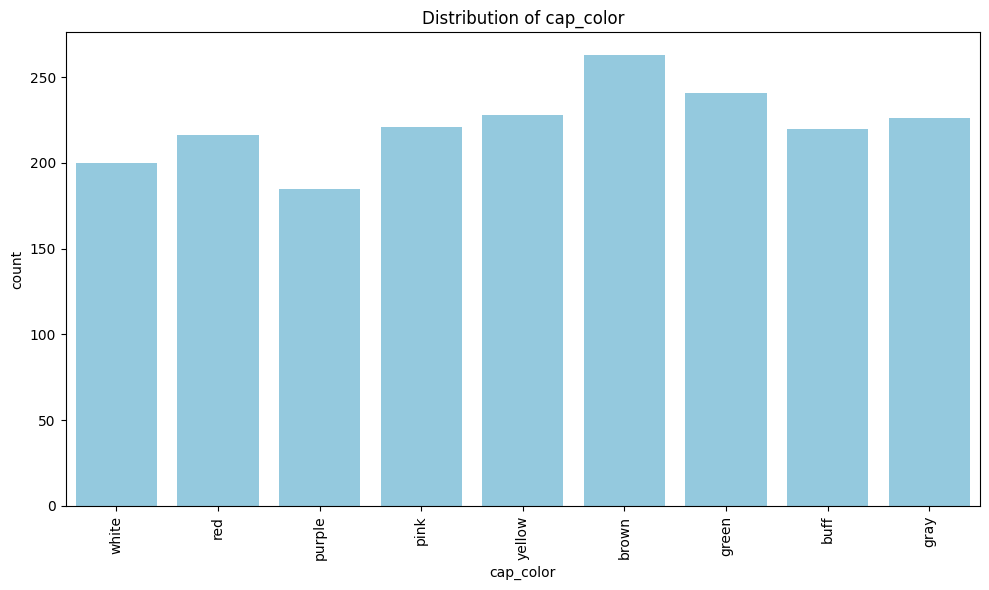

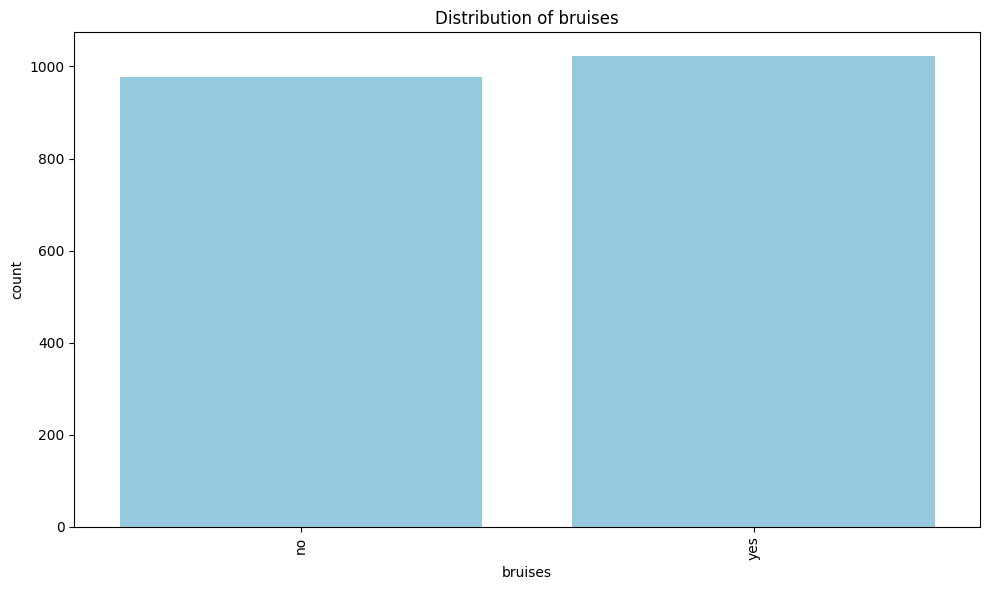

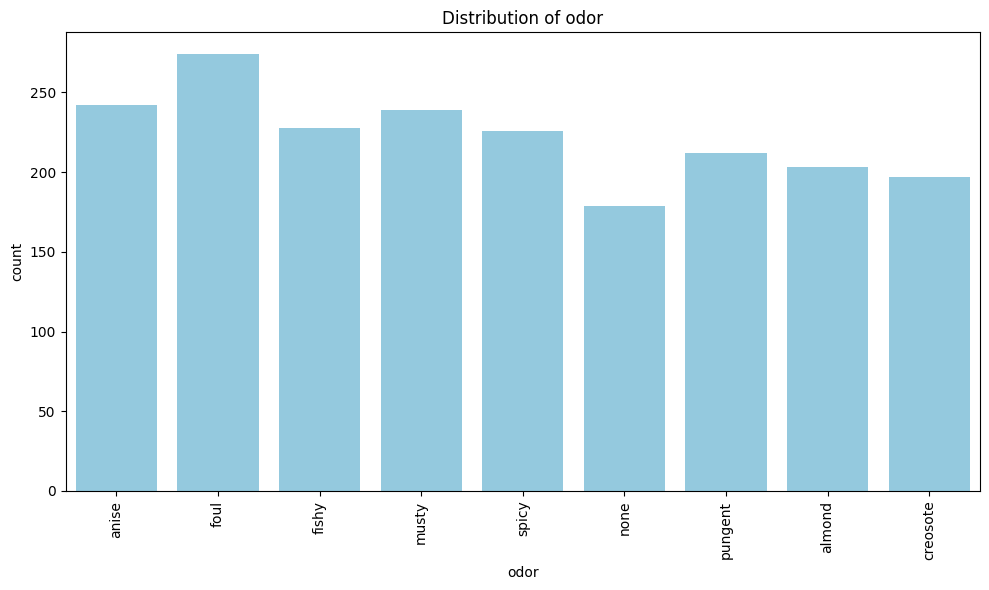

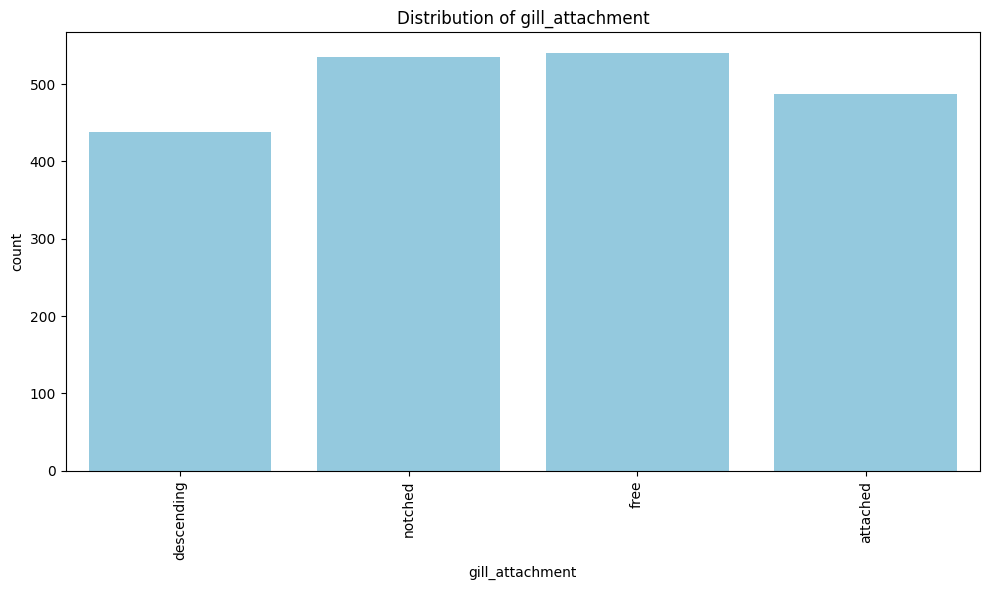

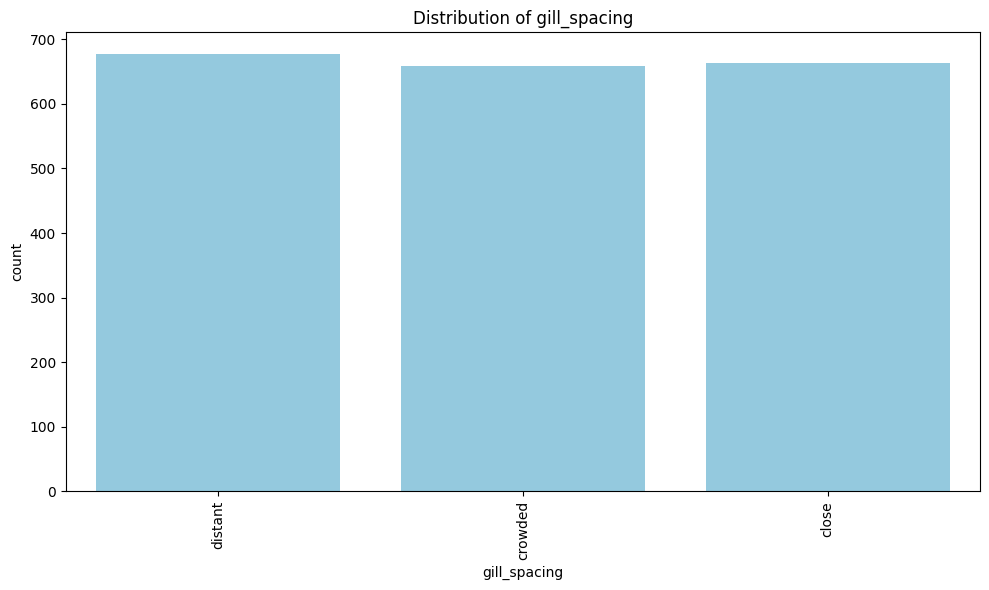

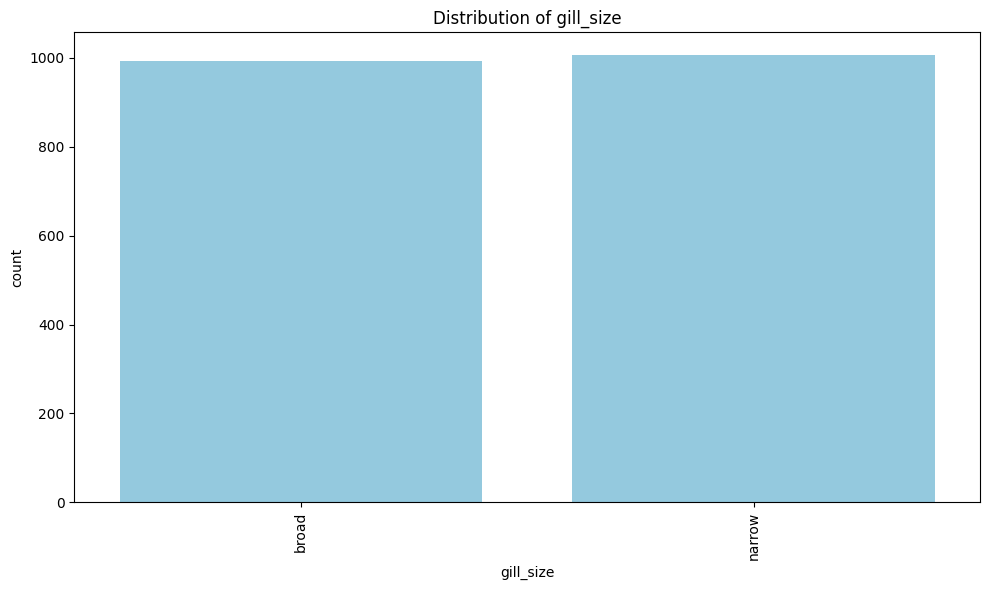

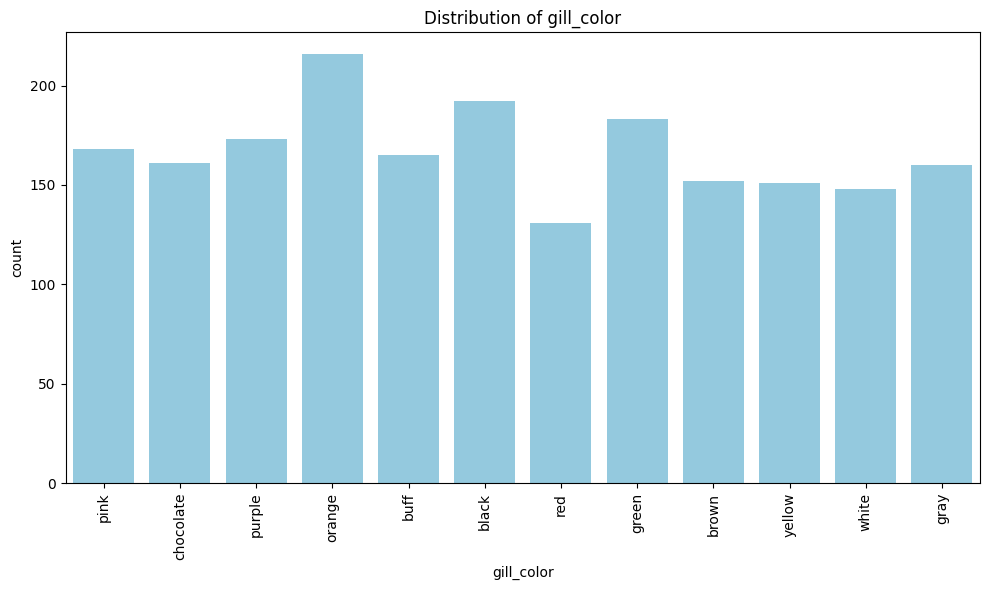

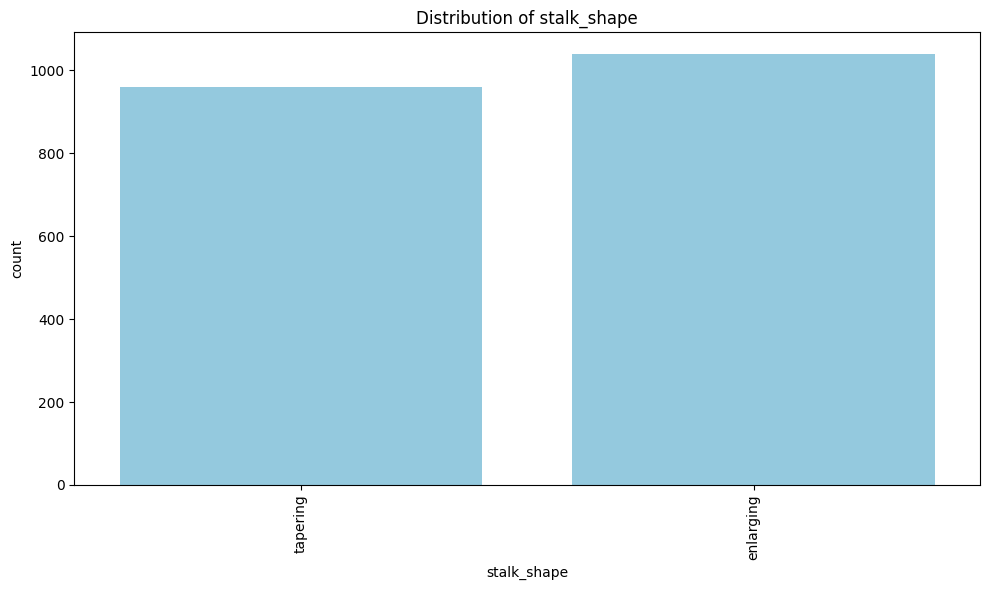

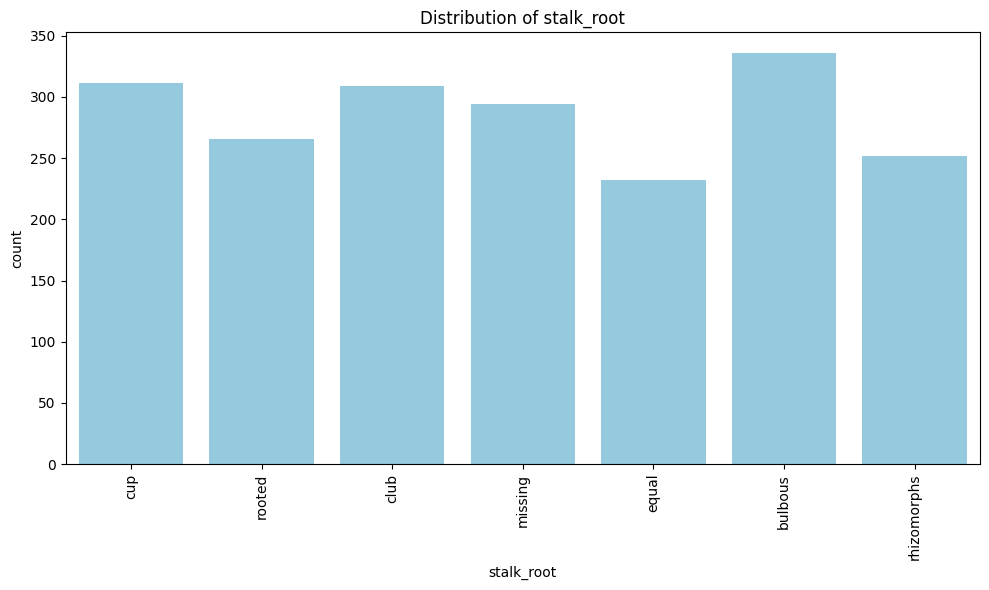

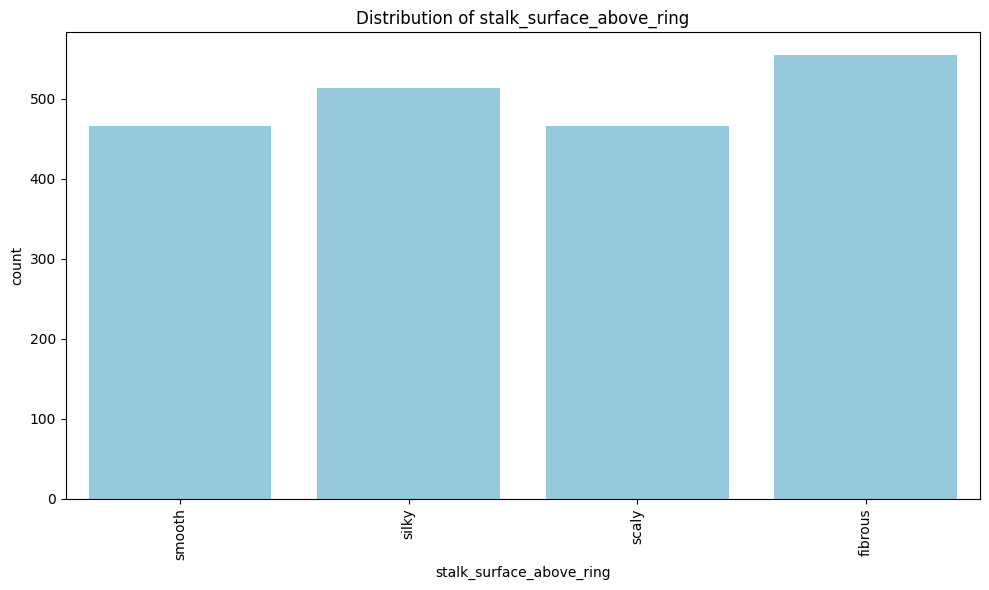

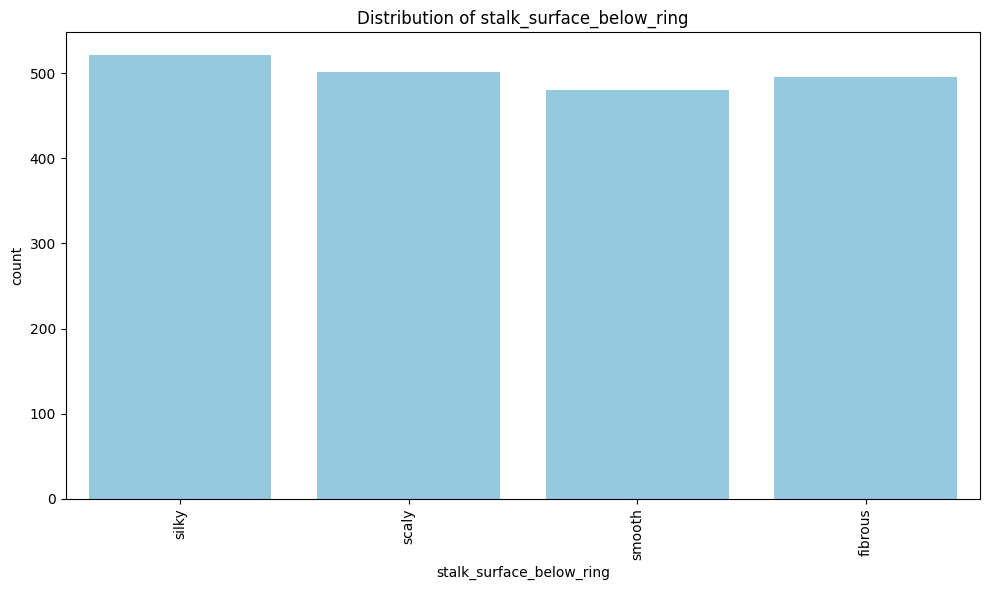

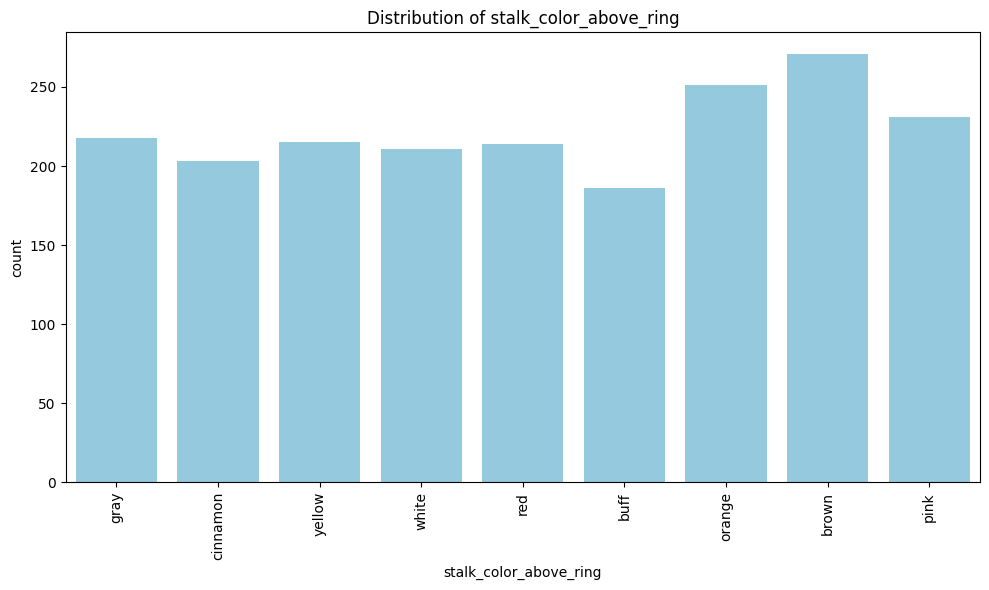

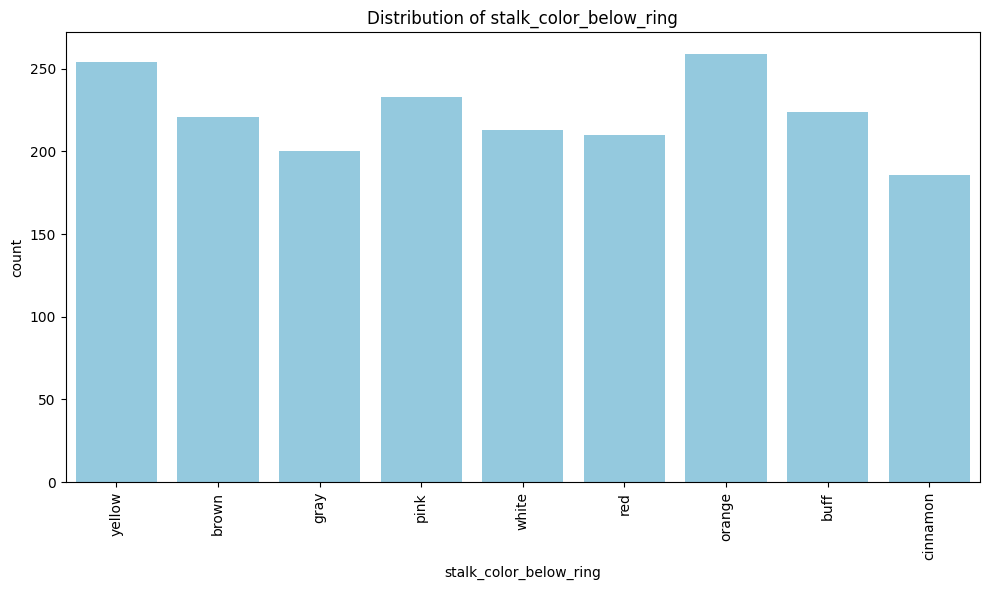

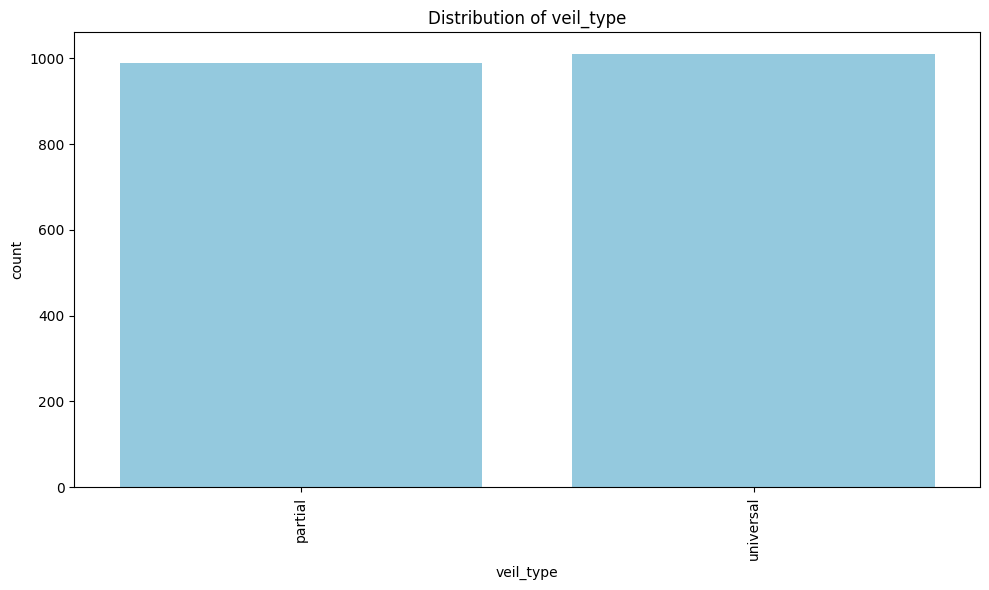

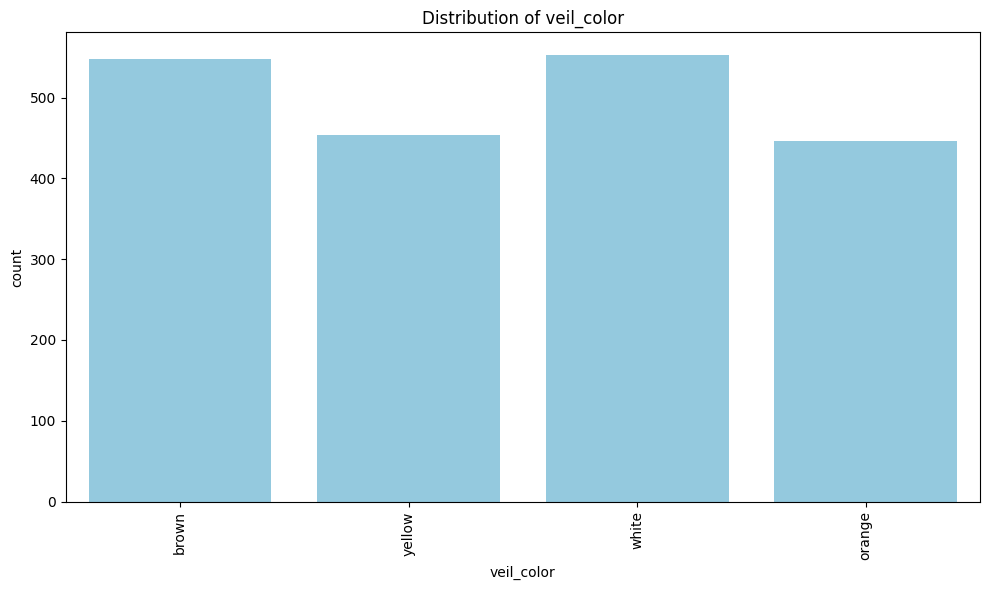

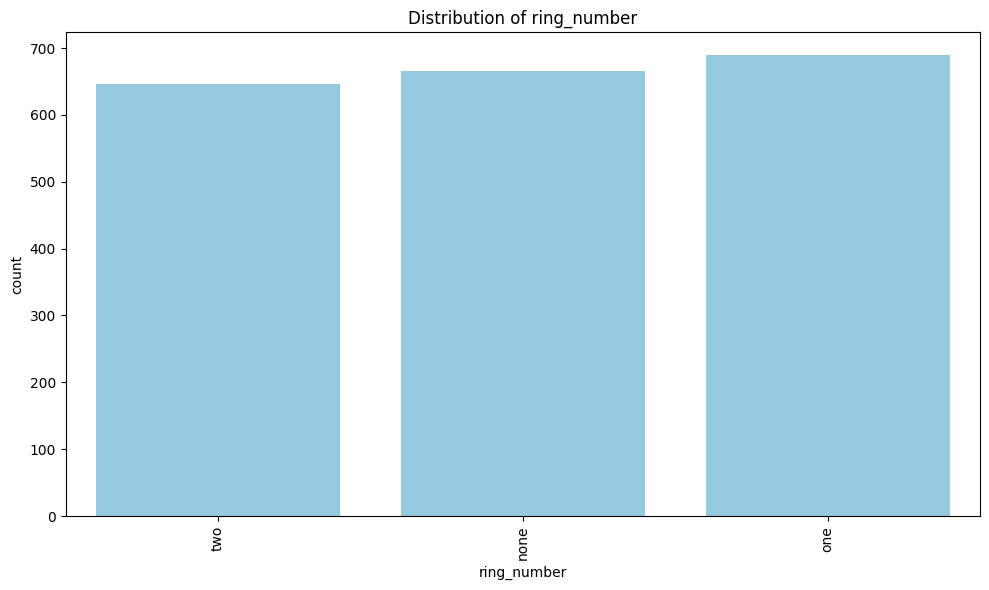

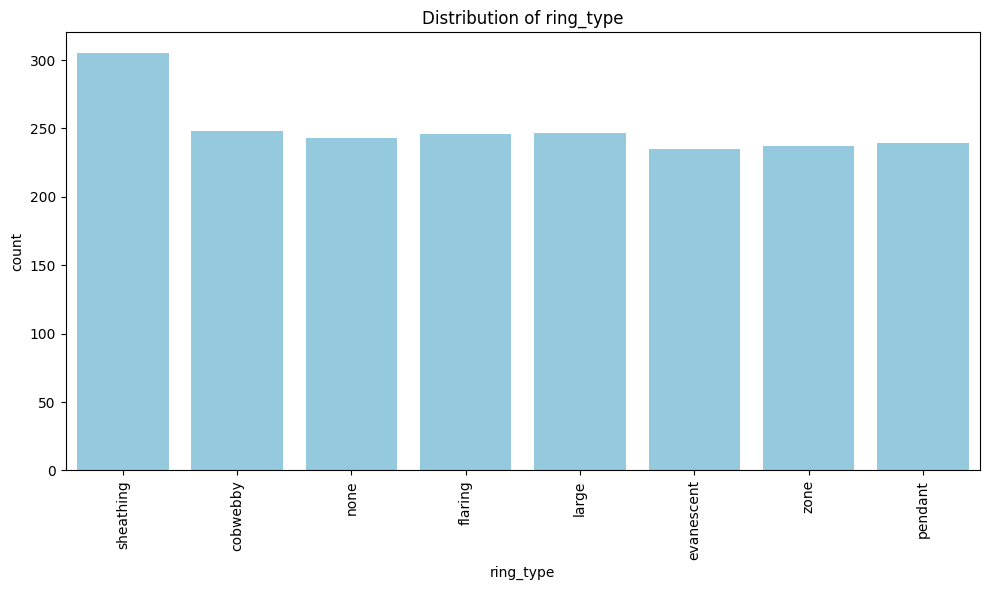

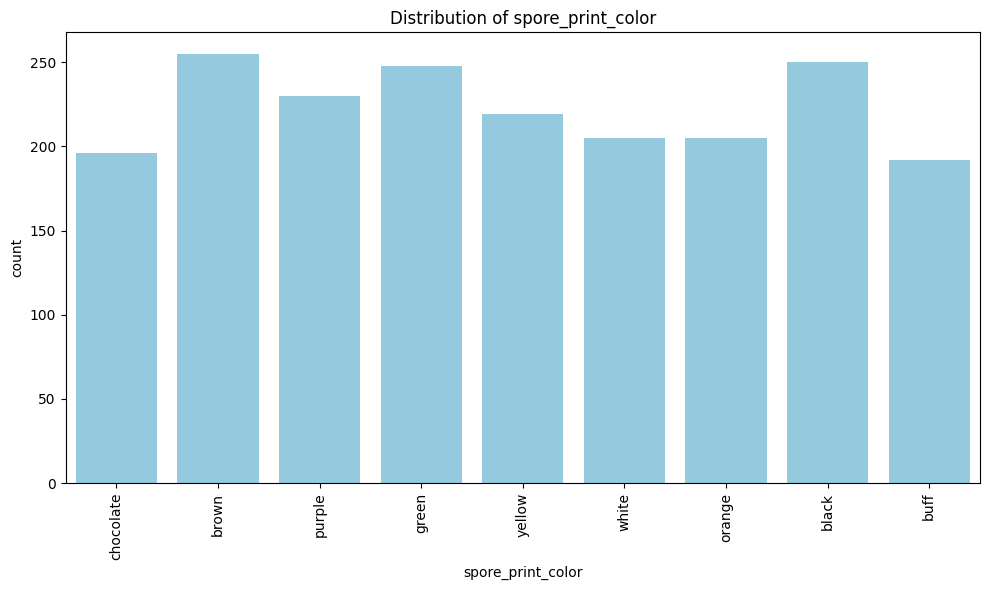

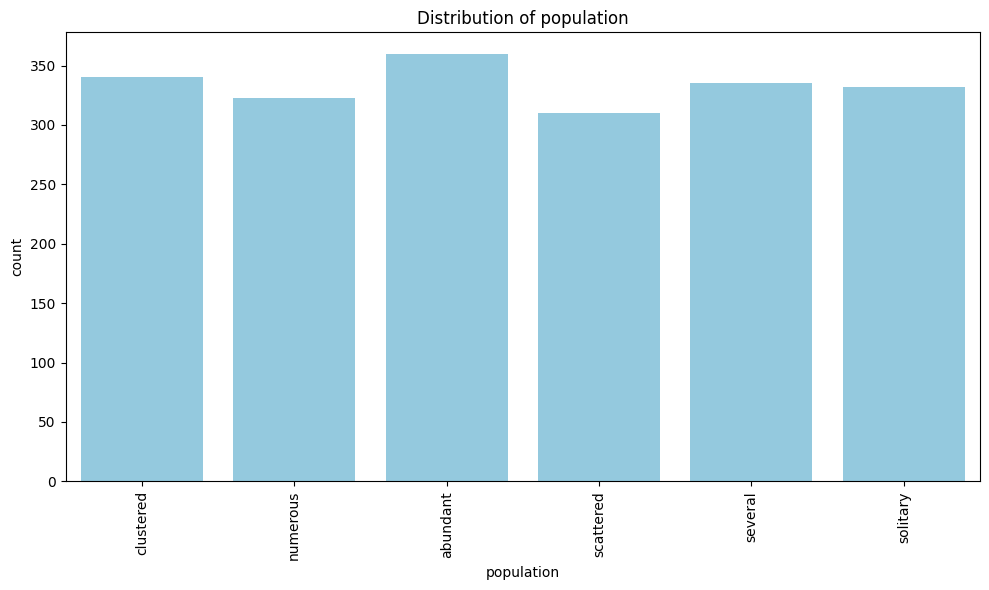

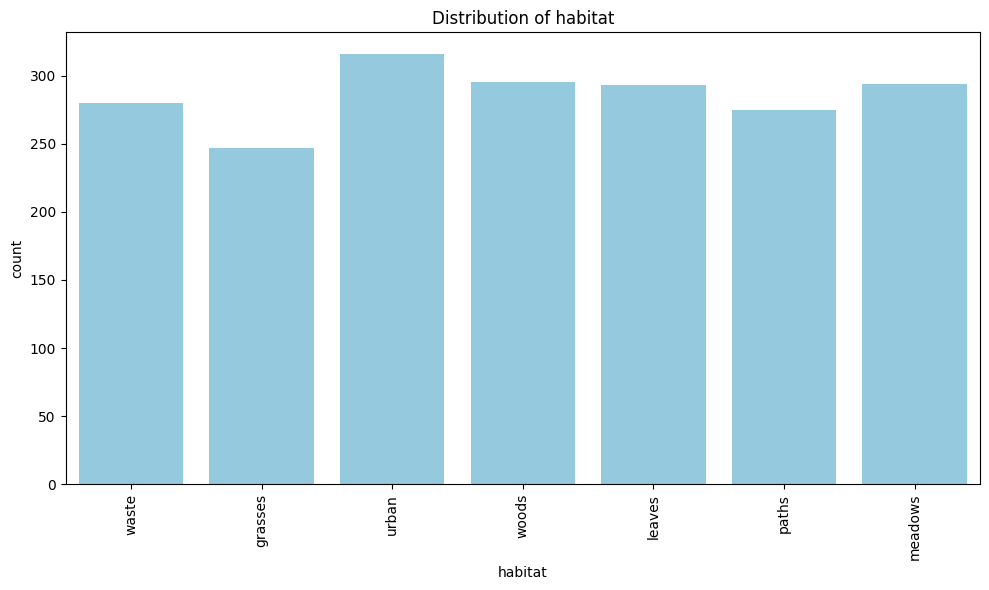

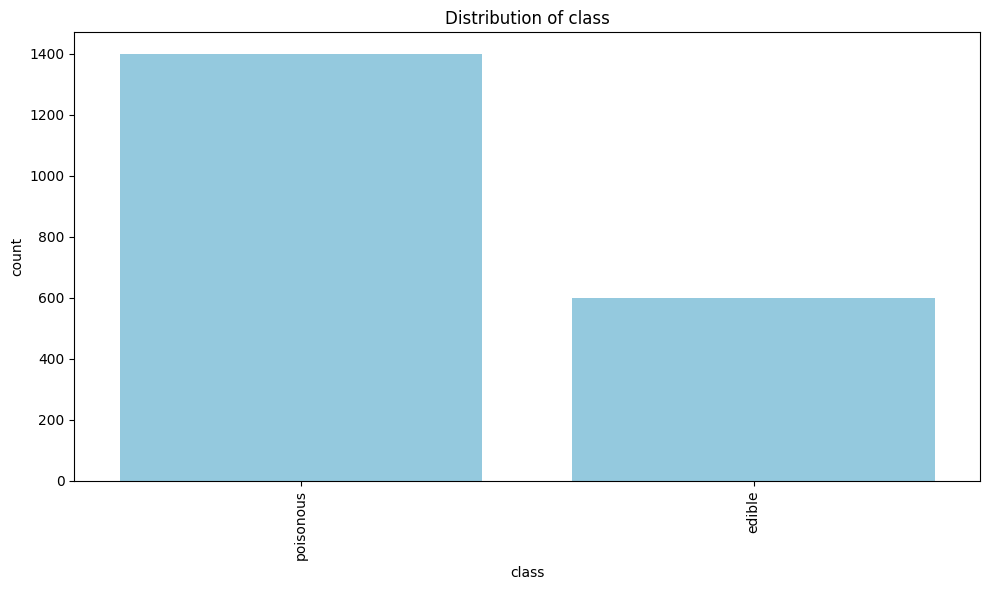

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature,color = 'skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

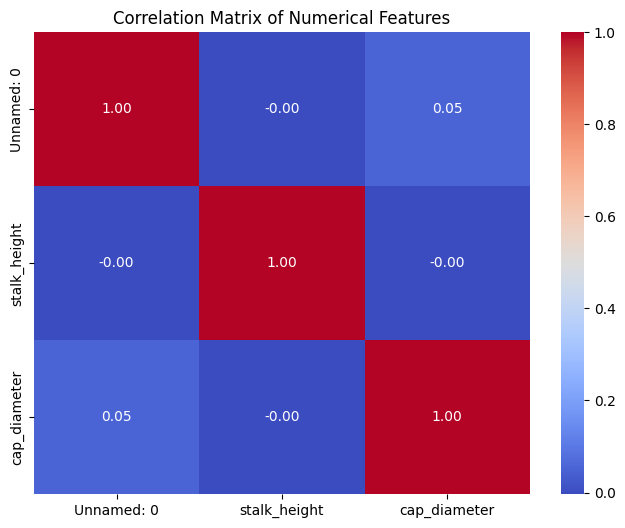

In [33]:
# Select only numerical features for correlation analysis
numerical_df = df[numerical_features]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Data Preprocessing

In [34]:
# Identify categorical columns (excluding 'Unnamed: 0' which is not a feature)
categorical_features = [col for col in df.columns if df[col].dtype == 'object' and col != 'Unnamed: 0']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Display the first few rows of the encoded DataFrame
display(df_encoded.head())

,Unnamed: 0,stalk_height,cap_diameter,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_grooves,cap_surface_scaly,cap_surface_smooth,...,population_scattered,population_several,population_solitary,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,class_poisonous
0,1167,14.276173,5.054983,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,True,False,True
1,1037,3.952715,19.068319,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,309,9.054265,7.205884,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,True,False,True
3,282,5.226499,20.932692,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
4,820,14.037532,12.545245,False,False,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True


In [35]:
# performing standardization
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Select the numerical columns from the encoded DataFrame
numerical_cols_encoded = ['Unnamed: 0', 'stalk_height', 'cap_diameter']

# Fit and transform the numerical columns
df_encoded[numerical_cols_encoded] = scaler.fit_transform(df_encoded[numerical_cols_encoded])

# Display the first few rows of the scaled DataFrame
display(df_encoded.head())

,Unnamed: 0,stalk_height,cap_diameter,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_grooves,cap_surface_scaly,cap_surface_smooth,...,population_scattered,population_several,population_solitary,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,class_poisonous
0,1.445410,1.576459,-1.030123,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,True,False,True
1,1.098741,-1.216463,0.958407,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,-0.842601,0.163717,-0.724904,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,True,False,True
3,-0.914602,-0.871852,1.222967,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
4,0.520072,1.511897,0.032765,False,False,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True


In [36]:
# feature variable and target variable
X = df_encoded.drop('class_poisonous', axis=1)
y = df_encoded['class_poisonous']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Features (X) shape: (2000, 105)
Target (y) shape: (2000,)


In [37]:
# Spliting the dataset into training and testing sets.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1600, 105)
X_test shape: (400, 105)
y_train shape: (1600,)
y_test shape: (400,)


 Data Visualization

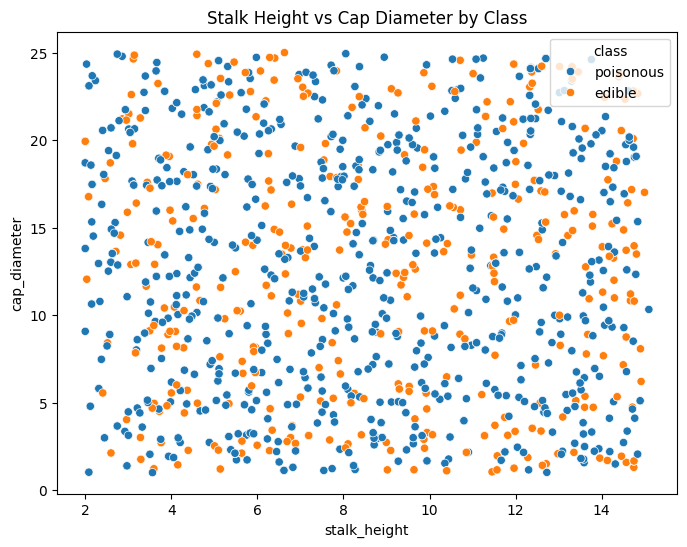

In [13]:
# Scatter plot of stalk_height vs cap_diameter colored by class
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='stalk_height', y='cap_diameter', hue='class')
plt.title('Stalk Height vs Cap Diameter by Class')
plt.show()

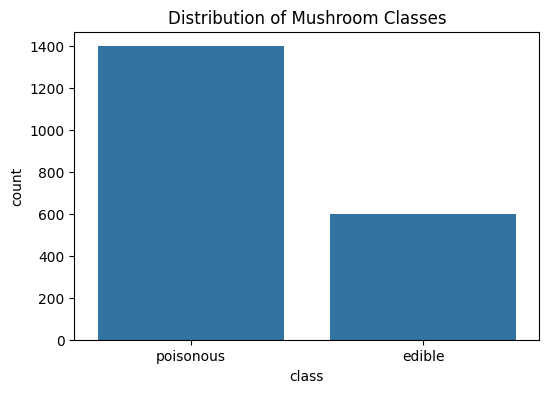

In [38]:
# countplot form mushroom classes
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='class')
plt.title('Distribution of Mushroom Classes')
plt.show()

 SVM Implementation

In [42]:
# 1.Implementing a basic SVM classifier using Python libraries like scikit-learn.
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize the SVM classifier
# Using a linear kernel for simplicity, can be changed to 'rbf', 'poly', etc.
svm_model = SVC(kernel='linear', random_state=42)

# Training the SVM model on the training data.
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)


In [43]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6675

Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       133
        True       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


 Visualization of SVM Results

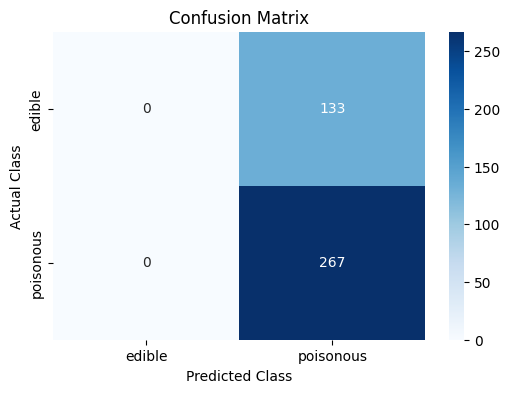

In [44]:
# Visualizing classification results on the testing data
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['edible', 'poisonous'], yticklabels=['edible', 'poisonous'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.show()

 Parameter Tuning and Optimization

In [45]:
# performing Tuning and Optimization with different SVM hyperparameters
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}
print("Hyperparameter grid defined:")
print(param_grid)

Hyperparameter grid defined:
{'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Instantiate an SVC model
svm_model = SVC(random_state=42)

# Instantiate a GridSearchCV object
grid_search = GridSearchCV(svm_model, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

Best parameters found by GridSearchCV:
{'C': 10, 'kernel': 'rbf'}


In [20]:
from sklearn.svm import SVC

# Get the best parameters from GridSearchCV
best_params = grid_search.best_params_

# Instantiate an SVC model with the best hyperparameters
best_svm_model = SVC(**best_params, random_state=42)

# Train the model on the entire training dataset
best_svm_model.fit(X_train, y_train)

SVC(C=10, random_state=42)

Optimized Model Accuracy: 0.89

Optimized Model Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.75      0.82       133
        True       0.89      0.96      0.92       267

    accuracy                           0.89       400
   macro avg       0.89      0.86      0.87       400
weighted avg       0.89      0.89      0.89       400



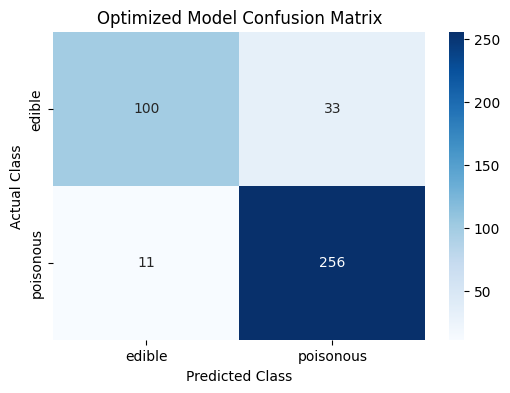

In [21]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set using the optimized model
y_pred_optimized = best_svm_model.predict(X_test)

# Evaluate the model
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print("Optimized Model Accuracy:", accuracy_optimized)

print("\nOptimized Model Classification Report:")
print(classification_report(y_test, y_pred_optimized))

# Calculate the confusion matrix for the optimized model
conf_matrix_optimized = confusion_matrix(y_test, y_pred_optimized)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_optimized, annot=True, fmt='d', cmap='Blues',
            xticklabels=['edible', 'poisonous'], yticklabels=['edible', 'poisonous'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Optimized Model Confusion Matrix')
plt.show()

Comparison and Analysis

**1. Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).**

During hyperparameter tuning, GridSearchCV compared the linear and RBF kernels. The RBF kernel with C=10 performed best, achieving 89% accuracy compared to the initial linear model's 67% accuracy (which predicted all as poisonous).

**2. Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.**

*   **Strengths:** SVM can achieve high accuracy with proper tuning (89% with RBF kernel). It handles the high-dimensional data well after encoding.
*   **Weaknesses:** Performance is very sensitive to kernel and hyperparameter choice. The initial linear model failed due to class imbalance and/or kernel choice. Interpretability is low with non-linear kernels.

**3. Discuss practical implications of SVM in real-world classification tasks.**

SVMs are used in image/text classification, bioinformatics, medical diagnosis, and finance. They are good with high-dimensional data and flexible with kernels. However, they require careful tuning, can be slow on large datasets, and are less interpretable.